The embeddings themselves are learnable parameters of the module, and their values are updated during training using backpropagation. By training a neural network to predict some task based on these embeddings, we can learn representations of the input data that are optimized for that task.

In [1]:
from matplotlib import pyplot as plt
from string import ascii_lowercase
from torch import tensor
from torch.nn import Embedding

data = [c for c in ascii_lowercase]
num_embeddings = len(data)
char2int = {c:i for (i,c) in enumerate(data)}

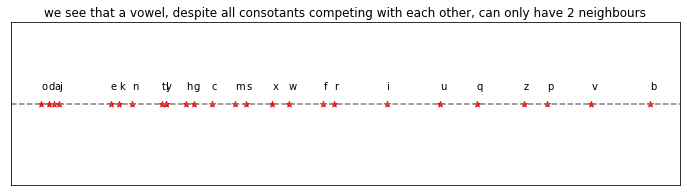

In [2]:
embedding_dim = 1
embedding = Embedding(num_embeddings=len(data), embedding_dim=embedding_dim)
input_embeddings = embedding(tensor(list(char2int.values()))).detach().numpy()
plt.figure(figsize=(12,3))
plt.axhline(y=0, color="gray", linestyle="--")
plt.scatter(x=input_embeddings, y=[0]*len(data), marker="*", color="red")
for (x,y,s) in zip(input_embeddings, [0.01]*len(data), list(char2int.keys())):
    plt.text(x=x, y=y, s=s)
plt.xticks([]); plt.yticks([])
plt.title("we see that a vowel, despite all consotants competing with each other, can only have 2 neighbours")
plt.show()

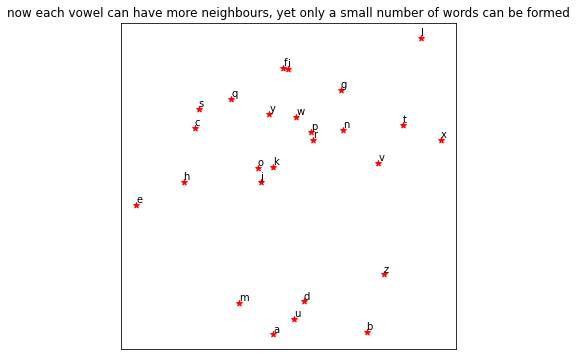

In [3]:
embedding_dim = 2
embedding = Embedding(num_embeddings=len(data), embedding_dim=embedding_dim)
input_embeddings = embedding(tensor(list(char2int.values()))).detach().numpy() * 10
plt.figure(figsize=(6,6))
plt.scatter(x=input_embeddings[:,0], y=input_embeddings[:,1], marker="*", color="red")
for (x,y,s) in zip(input_embeddings[:,0], input_embeddings[:,1]+0.2, list(char2int.keys())):
    plt.text(x=x, y=y, s=s)
plt.xticks([]); plt.yticks([])
plt.title("now each vowel can have more neighbours, yet only a small number of words can be formed")
plt.show()

Thus we see that, if our data is spread across more dimentions, the more intricate and complex relationships can be learnt through the embeddings. However, if dimensions are too many then, the computational effort to calculate the relationships between embeddings also increase. Also in the maniforld, there is a high chance that gradients can get stuck. So a balance has to be maintained.